In [23]:
import csv
import pandas as pd
from utils.user_group import Mobile, Stationary
import matplotlib.pyplot as plt
import numpy as np 
from utils.event import EventType, InstructionEvent

mobile_users = Mobile()
stationary_users = Stationary()

# A Stationnary vs Mobile Eye Trackers Comparison for Real-World Human-Robot Collaborative Assembly Tasks

## I- Participants

The aim of this study is to study the performance of different eye trackers devices for assembly tasks in industrial environments. Assembly tasks are simulated with Lego Duplo bricks in various experimental scenarios. Our study will focus on the accuracy obtained with each device. In this study, we will test two different configurations:
* A **stationary** configuration where the device(s) are positioned at different locations in the subject’s workspace.
* A **mobile** configuration where the device is in the form of glasses worn by the participant.

In addition to these two configurations, two experimental scenarios will be studied:
* The participant is in a **sitting** position during the assembly tasks.
* The participant is in a **standing** position during the assembly tasks.

80 subjects were recruited and divided into four groups:
* 20 subjects who performed the assembly tasks in a sitting position and whose eye data were recorded using fixed devices.
* 20 subjects who performed assembly tasks in a standing position and whose eye data were recorded using fixed devices.
* 20 subjects who performed assembly tasks in a sitting position and whose eye data were recorded using mobile devices.
* 20 subjects who performed assembly tasks in a standing position and whose eye data was recorded using mobile devices.

### I.1 - Participants Wearing glasses/contact lenses

One aspect that can interfere with eye trackers is wearing glasses or contact lenses, which can interfere with pupil detection and make it difficult to wear a mobile eye tracker. 

In this study, as long as it was possible to wear the mobile eye tracker and/or calibrate the various eye trackers, glasses/contact lenses were retained, even if this downgraded the performance of the eye tracking device.

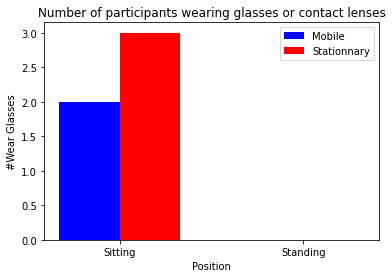

In [2]:
sitting = [0,0]
standing = [0,0]

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(user.is_wearing_glasses()):
        if(user.position == 'sitting'):
            sitting[0] += 1
        else:
            standing[0] += 1

for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(user.is_wearing_glasses()):
        if(user.position == 'sitting'):
            sitting[1] += 1
        else:
            standing[1] += 1

fig, ax = plt.subplots()
lab = ["Sitting", "Standing"]
r = np.arange(2)
bar_width = .33
positions_sitting = range(len(lab))
positions_standing = [pos + bar_width for pos in positions_sitting]
ax.bar(r, [sitting[0], standing[0]], width=bar_width, color='blue', label="Mobile")
ax.bar(r+bar_width, [sitting[1], standing[1]], width=bar_width, color='red', label="Stationnary")
ax.set_xticks(r + bar_width/2,lab)
ax.set_xlabel('Position')
ax.set_ylabel('#Wear Glasses')
ax.set_title('Number of participants wearing glasses or contact lenses')
ax.legend()
plt.show()
fig.savefig("../data_analysis/glasses.png")
plt.close()

### I.2 Calibration Issues

* **No Data**: Impossible to calibrate trackers. No data have been recorded
* **Severe Issue**: The trackers could be calibrated with severe calibration issues. The data was recorded but cannot be used
* **Slight Issue**: The trackers could be calibrated despite slight issues during calibration. The data has been recorded and can be used
* **No Issue**: No issue during the calibration

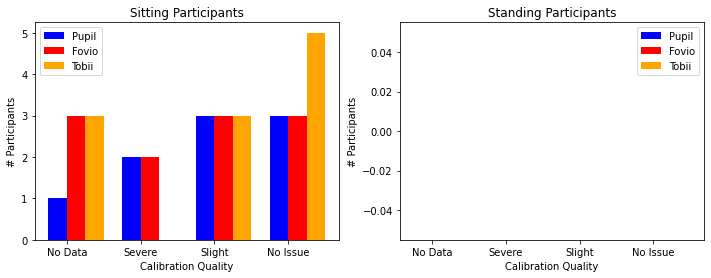

In [3]:
calibration = {0:'No Data', 1:'Severe', 2:'Slight', 3:'No Issue'}

sitting = {
    'Pupil':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Fovio':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Tobii':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0}
}
standing = {
    'Pupil':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Fovio':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0},
    'Tobii':{'No Data':0, 'Severe':0, 'Slight':0, 'No Issue':0}
}


for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(user.position == 'sitting'):
        sitting['Pupil'][calibration[user.pupil]]+=1
    else:
        standing['Pupil'][calibration[user.pupil]]+=1

for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(user.position == 'sitting'):
        sitting['Fovio'][calibration[user.fovio]]+=1
        sitting['Tobii'][calibration[user.tobii]]+=1
    else:
        standing['Fovio'][calibration[user.fovio]]+=1
        standing['Tobii'][calibration[user.tobii]]+=1
            
categories = sitting['Pupil'].keys()
r = np.arange(4)
bar_width = .25
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(r, [sitting['Pupil'][x] for x in categories], width=bar_width, color='blue', label="Pupil")
ax1.bar(r+bar_width, [sitting['Fovio'][x] for x in categories], width=bar_width, color='red', label="Fovio")
ax1.bar(r+bar_width*2, [sitting['Tobii'][x] for x in categories], width=bar_width, color='orange', label="Tobii")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Calibration Quality')
ax1.set_ylabel('# Participants')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Pupil'][x] for x in categories], width=bar_width, color='blue', label="Pupil")
ax2.bar(r+bar_width, [standing['Fovio'][x] for x in categories], width=bar_width, color='red', label="Fovio")
ax2.bar(r+bar_width*2, [standing['Tobii'][x] for x in categories], width=bar_width, color='orange', label="Tobii")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Calibration Quality')
ax2.set_ylabel('# Participants')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/calibration.png')
plt.close()

### I.3 Figure Recording Issues

Some technical problems (false contacts with eye-tracking glasses, OBS bug for Tobii/Fovio synchronization) may have caused the loss of some recordings. 

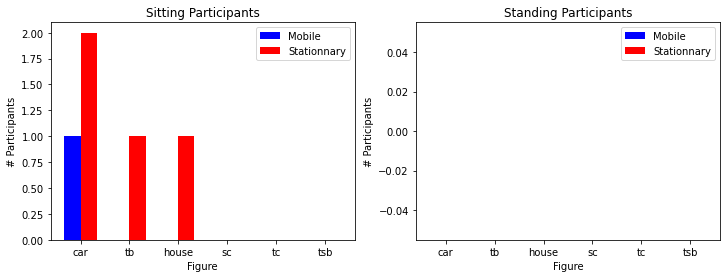

In [4]:
sitting = {
    'Mobile':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0},
    'Stationnary':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0}
}
standing = {
    'Mobile':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0},
    'Stationnary':{'car':0, 'tb':0, 'house':0, 'sc':0, "tc":0, 'tsb':0}
}

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(not user.has_data()):
        continue
    if(user.position == 'sitting'):
        for figure in sitting['Mobile'].keys():
            if(not user.has_figure_data(figure)):
                sitting['Mobile'][figure] += 1
    else:
        for figure in standing['Mobile'].keys():
            if(not user.has_figure_data(figure)):
                standing['Mobile'][figure] += 1

for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(not user.has_data()):
        continue
    if(user.position == 'sitting'):
        for figure in sitting['Stationnary'].keys():
            if(not user.has_figure_data(figure)):
                sitting['Stationnary'][figure] += 1
    else:
        for figure in standing['Stationnary'].keys():
            if(not user.has_figure_data(figure)):
                standing['Stationnary'][figure] += 1
                
categories = sitting['Mobile'].keys()
r = np.arange(6)
bar_width = .33
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.bar(r, [sitting['Mobile'][x] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# Participants')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# Participants')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/figure_recording_issues.png')
plt.close()

### I.4 Specific Issue for Mobile Participants

Some issues are specific to Pupil eye-tracking glasses.

Firstly, during calibration you can choose between: using both eyes using, only one of them (referred as eye0 and eye1). When one of the eyes is very poorly detected by the device, this allows calibration to be performed using only the correctly detected eye.

Secondly, in this study we chose to set and calibrate the eye-tracking device in such a way as to maximize eye-tracking performance on the table. However, this choice cause an issue when tracking gaze on the screen. Generally, only a small part of the screen is visible to the scene camera. To quantify this issue, we recorded the number of sides of the screen (ranging from 1 to 4) visible to the scene camera.

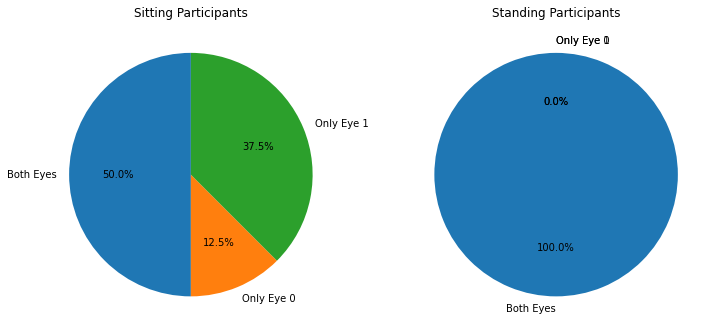

In [7]:
sitting = [0,0,0]
standing = [1,0,0] #TO CHANGE AFTER STANDING ANNOTATIONS

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(not user.has_data()):
        continue
    if(user.position == 'sitting'):
        if(user.eye0 == 1 and user.eye1 == 1):
            sitting[0] += 1
        elif(user.eye0 == 1):
            sitting[1] += 1
        else:
            sitting[2] += 1
    else:
        if(user.eye0 == 1 and user.eye1 == 1):
            standing[0] += 1
        elif(user.eye0 == 1):
            standing[1] += 1
        else:
            standing[2] += 1
            
labels = ["Both Eyes", "Only Eye 0", "Only Eye 1"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(sitting, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sitting Participants')
ax2.pie(standing, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Standing Participants')
fig.savefig("../data_analysis/eyes.png")


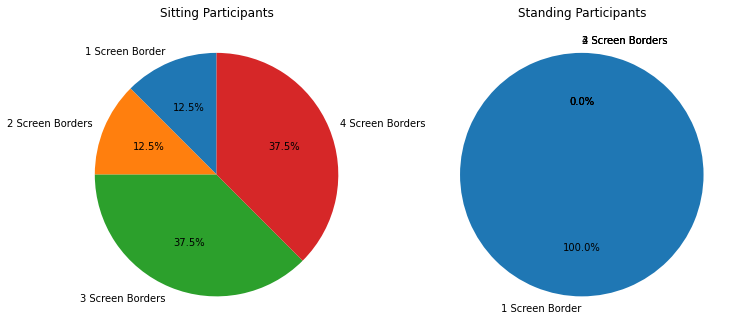

In [8]:
sitting = [0,0,0,0]
standing = [1,0,0,0] #TO CHANGE AFTER STANDING ANNOTATIONS

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(not user.has_data()):
        continue
    if(user.position == 'sitting'):
        sitting[user.screen-1] += 1
    else:
        standing[user.screen-1] += 1
            
labels = ["1 Screen Border", "2 Screen Borders", "3 Screen Borders", "4 Screen Borders"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.pie(sitting, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Sitting Participants')
ax2.pie(standing, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Standing Participants')
fig.savefig("../data_analysis/screen_border.png")

## II Event Annotation

blablabla les annotations

### II.1 Action Event

* **Grasp** The moment when the participant's hand comes into contact with the block in order to pick it up.
* **Release** The moment when the participant's hand releases the block with no intention to move it again.

### II.2 Action Event Annotation

* **Correct** Grasp the correct block or release block in the correct position
* **Error** Grasp a wrong block or release a possibly correct block in a wriing position
* **Bad ID**  The ID of the grasped and/or released block was incorrect. However, the shape and color of the block were correct.
* **Correction** Grasp a block released in a wrong position or release a wrong block grasped previously


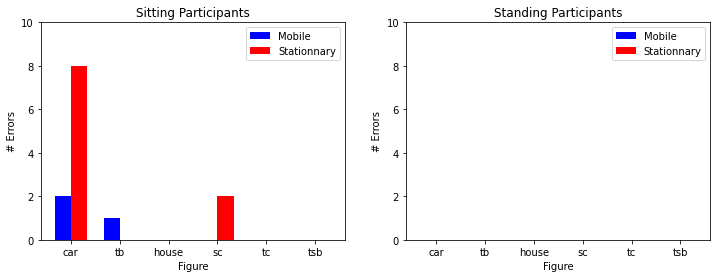

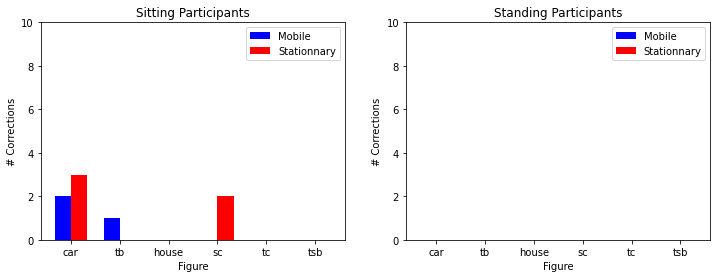

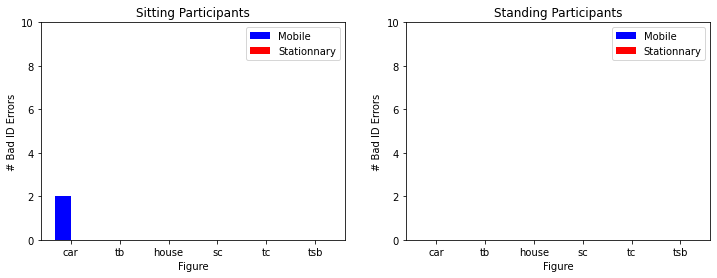

In [21]:
sitting = {
    'Mobile':{'car':[0,0,0], 'tb':[0,0,0], 'house':[0,0,0], 'sc':[0,0,0], "tc":[0,0,0], 'tsb':[0,0,0]},
    'Stationnary':{'car':[0,0,0], 'tb':[0,0,0], 'house':[0,0,0], 'sc':[0,0,0], "tc":[0,0,0], 'tsb':[0,0,0]}
}
standing = {
    'Mobile':{'car':[0,0,0], 'tb':[0,0,0], 'house':[0,0,0], 'sc':[0,0,0], "tc":[0,0,0], 'tsb':[0,0,0]},
    'Stationnary':{'car':[0,0,0], 'tb':[0,0,0], 'house':[0,0,0], 'sc':[0,0,0], "tc":[0,0,0], 'tsb':[0,0,0]}
}

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(not user.has_data()):
        continue
    for figure in ["car", "tb", "house", "sc", "tc", "tsb"]:
        if(user.has_figure_data(figure)):
            df = pd.DataFrame(pd.read_csv(f"../dataset/{user.setup}/{user.position}/{user.id}/{figure}/events.csv"))
            for i in df.index:
                event_type = EventType(int(df.loc[i,"type"]))
                if(not event_type == EventType.LEGAL):
                    if(user.position == 'sitting'):
                        sitting['Mobile'][figure][event_type.value-1] += 1
                    else:
                        standing['Mobile'][figure][event_type.value-1] += 1
                        
for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(not user.has_data()):
        continue
    for figure in ["car", "tb", "house", "sc", "tc", "tsb"]:
        if(user.has_figure_data(figure)):
            df = pd.DataFrame(pd.read_csv(f"../dataset/{user.setup}/{user.position}/{user.id}/{figure}/events.csv"))
            for i in df.index:
                event_type = EventType(int(df.loc[i,"type"]))
                if(not event_type == EventType.LEGAL):
                    if(user.position == 'sitting'):
                        sitting['Stationnary'][figure][event_type.value-1] += 1
                    else:
                        standing['Stationnary'][figure][event_type.value-1] += 1
                        
categories = ["car", "tb", "house", "sc", "tc", "tsb"]

r = np.arange(6)
bar_width = .33

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_ylim(0,10)
ax2.set_ylim(0,10)
ax1.bar(r, [sitting['Mobile'][x][0] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x][0] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# Errors')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x][0] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x][0] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# Errors')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/action_events_error.png')
plt.close()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_ylim(0,10)
ax2.set_ylim(0,10)
ax1.bar(r, [sitting['Mobile'][x][2] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x][2] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# Corrections')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x][2] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x][2] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# Corrections')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/action_events_correction.png')
plt.close()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_ylim(0,10)
ax2.set_ylim(0,10)
ax1.bar(r, [sitting['Mobile'][x][1] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x][1] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# Bad ID Errors')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x][1] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x][1] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# Bad ID Errors')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/action_events_bad_id.png')
plt.close()

### II.3 Instruction Event Annotation

* **Start** Assembly starts
* **Next** The participant press the next button
* **Previous** The participant press the previous button
* **No Next Error** The participant grasp a block before press next button
* **Extra Next Error** The participant press the next button before release the block
* **End** Assembly ends

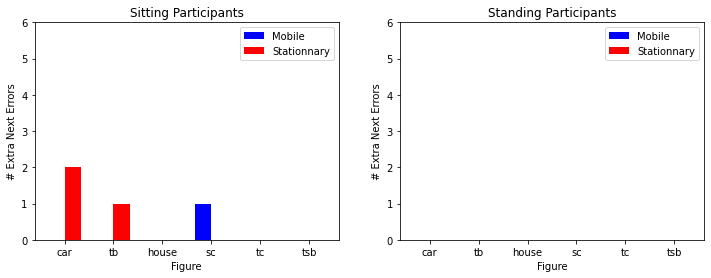

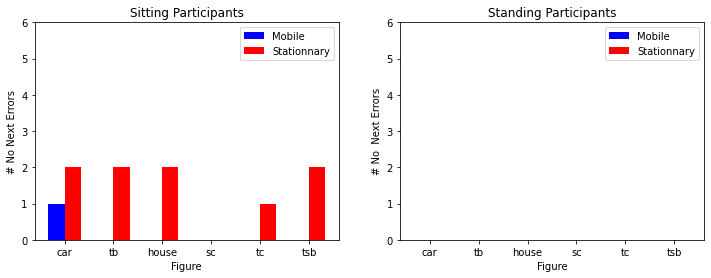

In [26]:
sitting = {
    'Mobile':{'car':[0,0], 'tb':[0,0], 'house':[0,0], 'sc':[0,0], "tc":[0,0], 'tsb':[0,0]},
    'Stationnary':{'car':[0,0], 'tb':[0,0], 'house':[0,0], 'sc':[0,0], "tc":[0,0], 'tsb':[0,0]}
}
standing = {
    'Mobile':{'car':[0,0], 'tb':[0,0], 'house':[0,0], 'sc':[0,0], "tc":[0,0], 'tsb':[0,0]},
    'Stationnary':{'car':[0,0], 'tb':[0,0], 'house':[0,0], 'sc':[0,0], "tc":[0,0], 'tsb':[0,0]}
}

for id in mobile_users.get_id_list():
    user = mobile_users.get_user(id)
    if(not user.has_data()):
        continue
    for figure in ["car", "tb", "house", "sc", "tc", "tsb"]:
        if(user.has_figure_data(figure)):
            df = pd.DataFrame(pd.read_csv(f"../dataset/{user.setup}/{user.position}/{user.id}/{figure}/instruction_events.csv"))
            for i in df.index:
                code = InstructionEvent(int(df.loc[i,"code"]))
                if(code == InstructionEvent.EXTRA_NEXT_ERROR):
                    if(user.position == 'sitting'):
                        sitting['Mobile'][figure][0] += 1
                    else:
                        standing['Mobile'][figure][0] += 1
                if(code == InstructionEvent.NO_NEXT_ERROR):
                    if(user.position == 'sitting'):
                        sitting['Mobile'][figure][1] += 1
                    else:
                        standing['Mobile'][figure][1] += 1
                    
                        
for id in stationary_users.get_id_list():
    user = stationary_users.get_user(id)
    if(not user.has_data()):
        continue
    for figure in ["car", "tb", "house", "sc", "tc", "tsb"]:
        if(user.has_figure_data(figure)):
            df = pd.DataFrame(pd.read_csv(f"../dataset/{user.setup}/{user.position}/{user.id}/{figure}/instruction_events.csv"))
            for i in df.index:
                code = InstructionEvent(int(df.loc[i,"code"]))
                if(code == InstructionEvent.EXTRA_NEXT_ERROR):
                    if(user.position == 'sitting'):
                        sitting['Stationnary'][figure][0] += 1
                    else:
                        standing['Stationnary'][figure][0] += 1
                if(code == InstructionEvent.NO_NEXT_ERROR):
                    if(user.position == 'sitting'):
                        sitting['Stationnary'][figure][1] += 1
                    else:
                        standing['Stationnary'][figure][1] += 1
                        
categories = ["car", "tb", "house", "sc", "tc", "tsb"]

r = np.arange(6)
bar_width = .33

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
ax1.bar(r, [sitting['Mobile'][x][0] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x][0] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# Extra Next Errors')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x][0] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x][0] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# Extra Next Errors')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/instruction_events_extra_next_errors.png')
plt.close()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
ax1.bar(r, [sitting['Mobile'][x][1] for x in categories], width=bar_width, color='blue', label="Mobile")
ax1.bar(r+bar_width, [sitting['Stationnary'][x][1] for x in categories], width=bar_width, color='red', label="Stationnary")
ax1.set_xticks(r + bar_width/2,categories)
ax1.set_xlabel('Figure')
ax1.set_ylabel('# No Next Errors')
ax1.set_title("Sitting Participants")
ax1.legend()

ax2.bar(r, [standing['Mobile'][x][1] for x in categories], width=bar_width, color='blue', label="Mobile")
ax2.bar(r+bar_width, [standing['Stationnary'][x][1] for x in categories], width=bar_width, color='red', label="Stationnary")
ax2.set_xticks(r + bar_width/2,categories)
ax2.set_xlabel('Figure')
ax2.set_ylabel('# No  Next Errors')
ax2.set_title("Standing Participants")
ax2.legend()
plt.show()
plt.tight_layout()
fig.savefig('../data_analysis/instruction_events_no_next_errors.png')
plt.close()

## III Eye Trackers Reliability 

## IV Distance Analysis

### IV.1 Before Grasp Events

### IV.2 Before Release Events